In [1]:
import pandas as pd
iris_data = pd.read_csv("data/iris.data",sep=",",names=['sepal_length','sepal_width','petal_length','petal_width','class'])
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


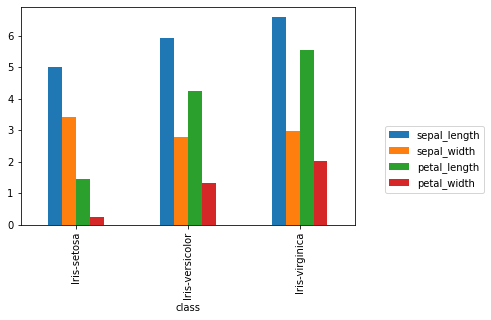

In [2]:
from matplotlib import pyplot as plt 
grouped_data = iris_data.groupby("class")
group_mean = grouped_data.mean()
group_mean.plot(kind="bar")
plt.legend(loc="center right",bbox_to_anchor=(1.4,0.3),ncol=1)
plt.show()

In [3]:
import numpy as np
msk = np.random.rand(len(iris_data))<0.8
train_data_origin = iris_data[msk]
test_data_origin = iris_data[~msk]

train_data = train_data_origin.reset_index(drop=True)
test_data = test_data_origin.reset_index(drop=True)

train_label = train_data['class']
test_label = test_data['class']

train_fea = train_data.drop('class',1)
test_fea = test_data.drop('class',1)
print(train_fea.shape)
print(test_fea.shape)

(118, 4)
(32, 4)


In [4]:
train_norm = (train_fea-train_fea.min())/(train_fea.max()-train_fea.min())
test_norm = (test_fea-test_fea.min())/(test_fea.max()-test_fea.min())
train_norm.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,0.235294,0.590909,0.067797,0.041667
1,0.176471,0.363636,0.067797,0.041667
2,0.117647,0.454545,0.050847,0.041667
3,0.088235,0.409091,0.084746,0.041667
4,0.088235,0.545455,0.067797,0.083333
5,0.205882,0.545455,0.084746,0.041667
6,0.176471,0.409091,0.084746,0.000000
7,0.323529,0.681818,0.084746,0.041667
8,0.147059,0.545455,0.101695,0.041667
9,0.147059,0.363636,0.067797,0.000000


In [5]:
def getAccuracy(testSet,predictions):
    correct = 0
    for x in range(len(testSet)):
        if(testSet[x]==predictions[x]):
            correct+=1
    return (correct/float(len(testSet))) * 100.0

In [6]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(train_norm,train_label)
predict = knn.predict(test_norm)
accuracy = getAccuracy(test_label,predict)
print("Accuracy:" + repr(accuracy) + "%")

Accuracy:96.875%
